In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as shc
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from tabulate import tabulate
from sklearn.model_selection import ShuffleSplit
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold

In [2]:
taxi=pd.read_csv(r"\Users\Mano\Documents\Taxi Fare Prediction\Dataset\TaxiFare.csv")

In [3]:
taxi.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [4]:
taxi.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x20e16d95a90>,
 'caps': [<matplotlib.lines.Line2D at 0x20e178b2130>,
 'boxes': [<matplotlib.lines.Line2D at 0x20e16d95640>],
 'medians': [<matplotlib.lines.Line2D at 0x20e178b2850>],
 'fliers': [<matplotlib.lines.Line2D at 0x20e178b2be0>],
 'means': []}

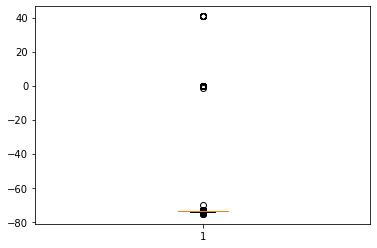

In [5]:
plt.boxplot(taxi.longitude_of_pickup)

In [6]:
q3=taxi["longitude_of_pickup"].quantile(0.75)
q1=taxi["longitude_of_pickup"].quantile(0.25)
iqr= q3-q1

In [7]:
upper_limt=q1+(iqr*1.5)
lower_limt=q3-(iqr*1.5)

In [8]:
upper_limt

-73.95469100000001

In [9]:
lower_limt

-74.004519

In [10]:
taxi["longitude_of_pickup"]=np.where(taxi["longitude_of_pickup"] >= upper_limt,upper_limt,np.where(taxi["longitude_of_pickup"] <= lower_limt,lower_limt,taxi["longitude_of_pickup"]))

{'whiskers': [<matplotlib.lines.Line2D at 0x20e179b44f0>,
 'caps': [<matplotlib.lines.Line2D at 0x20e179b4c10>,
 'boxes': [<matplotlib.lines.Line2D at 0x20e179b4160>],
 'medians': [<matplotlib.lines.Line2D at 0x20e179c1370>],
 'fliers': [<matplotlib.lines.Line2D at 0x20e179c1700>],
 'means': []}

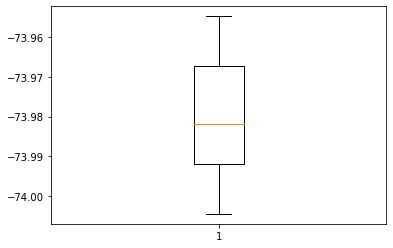

In [11]:
plt.boxplot(taxi.longitude_of_pickup)

{'whiskers': [<matplotlib.lines.Line2D at 0x20e17a211f0>,
 'caps': [<matplotlib.lines.Line2D at 0x20e17a21910>,
 'boxes': [<matplotlib.lines.Line2D at 0x20e17a12e20>],
 'medians': [<matplotlib.lines.Line2D at 0x20e17a2c070>],
 'fliers': [<matplotlib.lines.Line2D at 0x20e17a2c400>],
 'means': []}

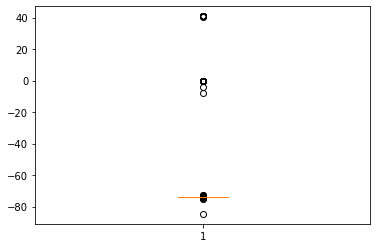

In [12]:
plt.boxplot(taxi.longitude_of_dropoff)

In [13]:
q3=taxi["longitude_of_dropoff"].quantile(0.75)
q1=taxi["longitude_of_dropoff"].quantile(0.25)
iqr= q3-q1

In [14]:
upper_limt=q1+(iqr*1.5)
lower_limt=q3-(iqr*1.5)

In [15]:
taxi["longitude_of_dropoff"]=np.where(taxi["longitude_of_dropoff"] >= upper_limt,upper_limt,np.where(taxi["longitude_of_dropoff"] <= lower_limt,lower_limt,taxi["longitude_of_dropoff"]))

{'whiskers': [<matplotlib.lines.Line2D at 0x20e17a85fa0>,
 'caps': [<matplotlib.lines.Line2D at 0x20e17a94700>,
 'boxes': [<matplotlib.lines.Line2D at 0x20e17a85c10>],
 'medians': [<matplotlib.lines.Line2D at 0x20e17a94e20>],
 'fliers': [<matplotlib.lines.Line2D at 0x20e17a9f1f0>],
 'means': []}

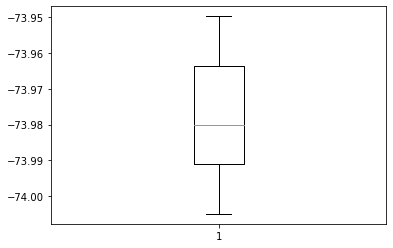

In [16]:
plt.boxplot(taxi.longitude_of_dropoff)

{'whiskers': [<matplotlib.lines.Line2D at 0x20e17b00130>,
 'caps': [<matplotlib.lines.Line2D at 0x20e17b00850>,
 'boxes': [<matplotlib.lines.Line2D at 0x20e17af0d60>],
 'medians': [<matplotlib.lines.Line2D at 0x20e17b00f70>],
 'fliers': [<matplotlib.lines.Line2D at 0x20e17b0a340>],
 'means': []}

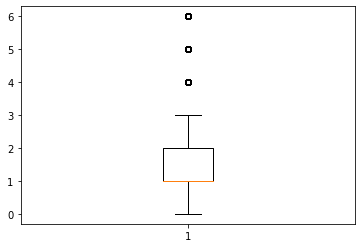

In [17]:
plt.boxplot(taxi.no_of_passenger)

In [18]:
q3=taxi["no_of_passenger"].quantile(0.75)
q1=taxi["no_of_passenger"].quantile(0.25)
iqr= q3-q1

In [19]:
upper_limt=q1+(iqr*1.5)
lower_limt=q3-(iqr*1.5)

In [20]:
taxi["no_of_passenger"]=np.where(taxi["no_of_passenger"] >= upper_limt,upper_limt,np.where(taxi["no_of_passenger"] <= lower_limt,lower_limt,taxi["no_of_passenger"]))

{'whiskers': [<matplotlib.lines.Line2D at 0x20e17b696a0>,
 'caps': [<matplotlib.lines.Line2D at 0x20e17b69dc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x20e17b69310>],
 'medians': [<matplotlib.lines.Line2D at 0x20e17b75520>],
 'fliers': [<matplotlib.lines.Line2D at 0x20e17b758b0>],
 'means': []}

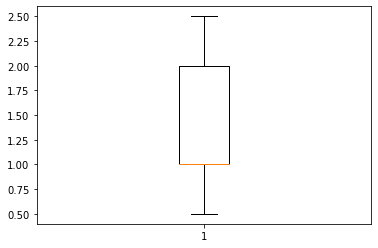

In [21]:
plt.boxplot(taxi.no_of_passenger)

{'whiskers': [<matplotlib.lines.Line2D at 0x20e17bd97f0>,
 'caps': [<matplotlib.lines.Line2D at 0x20e17bd9f10>,
 'boxes': [<matplotlib.lines.Line2D at 0x20e17bd9460>],
 'medians': [<matplotlib.lines.Line2D at 0x20e17be4670>],
 'fliers': [<matplotlib.lines.Line2D at 0x20e17be4a00>],
 'means': []}

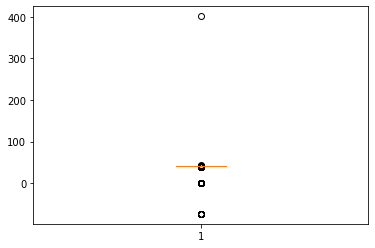

In [22]:
plt.boxplot(taxi.latitude_of_pickup)

In [23]:
q3=taxi["latitude_of_pickup"].quantile(0.75)
q1=taxi["latitude_of_pickup"].quantile(0.25)
iqr= q3-q1

In [24]:
upper_limt=q1+(iqr*1.5)
lower_limt=q3-(iqr*1.5)

In [25]:
upper_limt

40.78360074999999

In [26]:
lower_limt

40.718639749999994

In [27]:
taxi["latitude_of_pickup"]=np.where(taxi["latitude_of_pickup"] >= upper_limt,upper_limt,np.where(taxi["latitude_of_pickup"] <= lower_limt,lower_limt,taxi["latitude_of_pickup"]))

{'whiskers': [<matplotlib.lines.Line2D at 0x20e17e4f8b0>,
 'caps': [<matplotlib.lines.Line2D at 0x20e17e4ffd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x20e17e4f520>],
 'medians': [<matplotlib.lines.Line2D at 0x20e17e5d730>],
 'fliers': [<matplotlib.lines.Line2D at 0x20e17e5dac0>],
 'means': []}

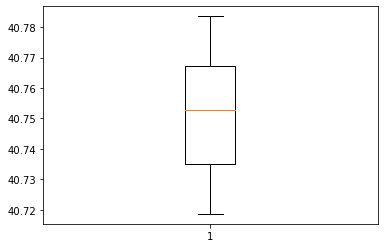

In [28]:
plt.boxplot(taxi.latitude_of_pickup)

{'whiskers': [<matplotlib.lines.Line2D at 0x20e17ebd460>,
 'caps': [<matplotlib.lines.Line2D at 0x20e17ebdb80>,
 'boxes': [<matplotlib.lines.Line2D at 0x20e17ebd0d0>],
 'medians': [<matplotlib.lines.Line2D at 0x20e17ecb2e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x20e17ecb670>],
 'means': []}

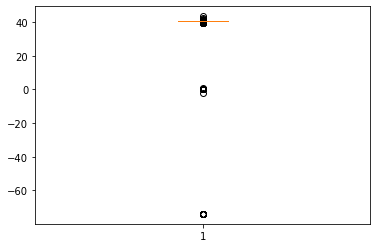

In [29]:
plt.boxplot(taxi.latitude_of_dropoff)

In [30]:
q3=taxi["latitude_of_dropoff"].quantile(0.75)
q1=taxi["latitude_of_dropoff"].quantile(0.25)
iqr= q3-q1

In [31]:
upper_limt=q1+(iqr*1.5)
lower_limt=q3-(iqr*1.5)

In [32]:
taxi["latitude_of_dropoff"]=np.where(taxi["latitude_of_dropoff"] >= upper_limt,upper_limt,np.where(taxi["latitude_of_dropoff"] <= lower_limt,lower_limt,taxi["latitude_of_dropoff"]))

{'whiskers': [<matplotlib.lines.Line2D at 0x20e17f2a370>,
 'caps': [<matplotlib.lines.Line2D at 0x20e17f2aa90>,
 'boxes': [<matplotlib.lines.Line2D at 0x20e17f1bfa0>],
 'medians': [<matplotlib.lines.Line2D at 0x20e17f351f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x20e17f35580>],
 'means': []}

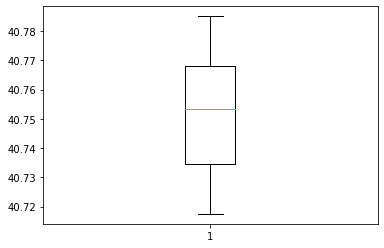

In [33]:
plt.boxplot(taxi.latitude_of_dropoff)

In [34]:
taxi.unique_id.unique()

array(['26:21.0', '52:16.0', '35:00.0', ..., '38:13.0', '04:12.0',
       '53:22.0'], dtype=object)

In [35]:
taxi.date_time_of_pickup.unique()

array(['2009-06-15 17:26:21 UTC', '2010-01-05 16:52:16 UTC',
       '2011-08-18 00:35:00 UTC', ..., '2011-01-30 04:53:00 UTC',
       '2012-11-06 07:09:00 UTC', '2010-01-13 08:13:14 UTC'], dtype=object)

In [36]:
taxi.drop(["unique_id","date_time_of_pickup"],axis=1,inplace=True)

In [37]:
dummie = pd.get_dummies(taxi)

In [38]:
dummie.head()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,4.5,-73.954691,40.721319,-73.949800,40.717474,1.0
1,16.9,-74.004519,40.718640,-73.979268,40.782004,1.0
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1.0


In [39]:
x=dummie.drop(["amount"],axis=1)

In [40]:
y=dummie.amount

In [41]:
trainx,testx,trainy,testy=train_test_split(x,y,test_size=0.2,random_state=42)

# RandomForestRegressor

In [42]:
rf=RandomForestRegressor(random_state=0)
rf.fit(trainx,trainy)

RandomForestRegressor(random_state=0)

In [43]:
rf.predict(testx)

array([ 9.495 , 31.7564,  4.878 , ...,  9.48  , 22.0876,  7.7791])

In [44]:
d=rf.score(testx,testy)

In [47]:
d

0.5009092137162034

In [45]:
rme3=sqrt(mean_squared_error(testy,rf.predict(testx),squared=False))

In [48]:
rme3

2.609946854239275